# 必要なライブラリをimport

In [177]:
import itertools

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 3D-PCRの変数を定義

In [236]:
sample_size = (12, 8, 10)
# sample_size = (5, 3, 4)

## 実際のデータを使う用

In [123]:
mode = 'real data'
c_x = [1]
c_y = [1]
c_z = [1]
re_test = list(itertools.product(c_x, c_y, c_z))
re_test_index = [j+max(i-1, 0)*sample_size[1]+sample_size[0]*sample_size[1]*k for i, j, k in re_test]

## シミュレーション用(Ramdom)

In [258]:
positive_sample_num = 2

# positiveをramdomに生成
# samples = np.zeros(sample_size, dtype='bool')
# indices = np.random.choice(np.prod(sample_size), positive_sample_num, replace=False)
# np.put(samples, indices, True)

# positiveの(x, y, z)を取得
indices = np.nonzero(samples)
positives = [(indices[0][i], indices[1][i], indices[2][i]) for i in range(len(indices[0]))]

# positiveになる層のindexを取得
c_x = np.where(np.any(samples, axis = (1, 2)))[0].tolist()
c_y = np.where(np.any(samples, axis = (0, 2)))[0].tolist()
c_z = np.where(np.any(samples, axis = (0, 1)))[0].tolist()
re_test = list(itertools.product(c_x, c_y, c_z))
# re_test_index = [j + max(i-1, 0)*sample_size[1] + sample_size[0]*sample_size[1]*k for i, j, k in re_test]
re_test_index = [j + i*sample_size[1] + sample_size[0]*sample_size[1]*k for i, j, k in re_test]


# better_Arrangement
arranged_samples = np.zeros(sample_size, dtype='bool')
arranged_samples.flat[:positive_sample_num] = True

indices = np.nonzero(arranged_samples)
arranged_positives = [(indices[0][i], indices[1][i], indices[2][i]) for i in range(len(indices[0]))]

c_x = np.where(np.any(arranged_samples, axis = (1, 2)))[0].tolist()
c_y = np.where(np.any(arranged_samples, axis = (0, 2)))[0].tolist()
c_z = np.where(np.any(arranged_samples, axis = (0, 1)))[0].tolist()
re_test_arranged = list(itertools.product(c_x, c_y, c_z))
re_test_arranged_index = [j + i*sample_size[1] + sample_size[0]*sample_size[1]*k for i, j, k in re_test_arranged]

In [251]:
re_test_index_arranged

[0, 96]

# 可視化

## positiveなsampleの位置を可視化

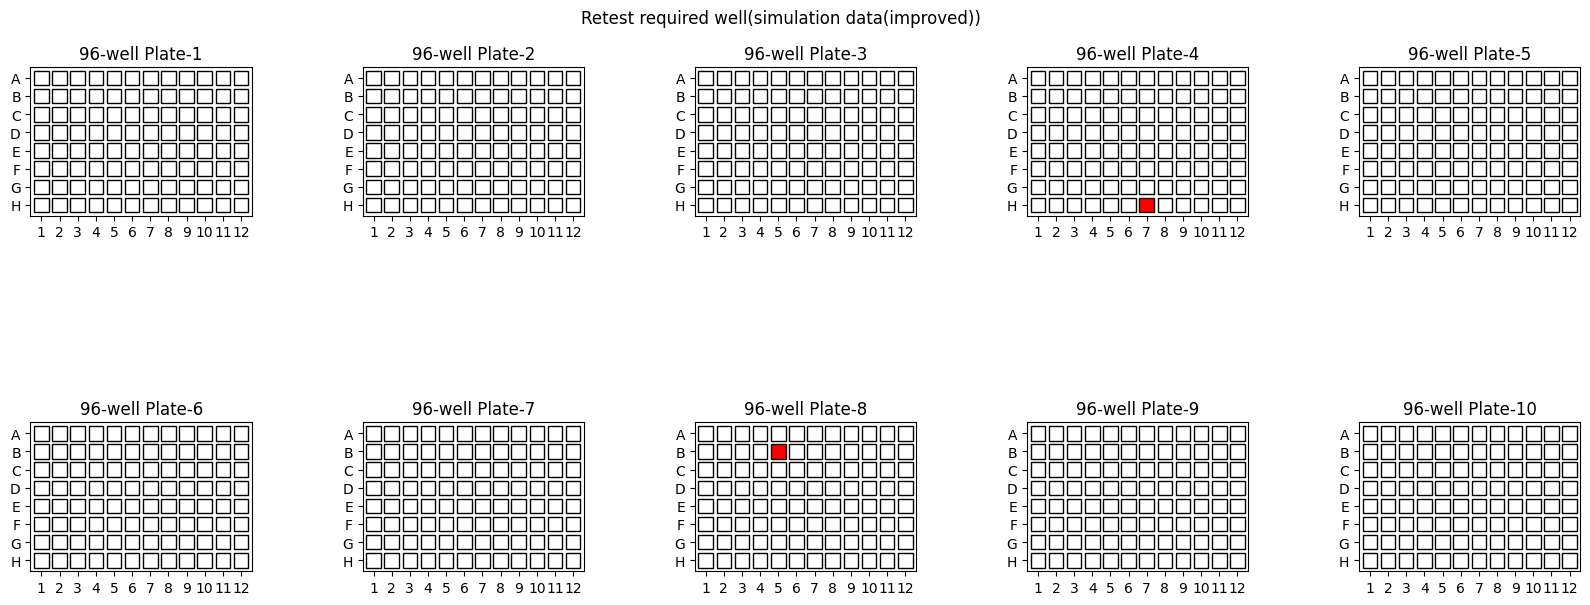

In [241]:
fig = plt.figure(figsize=(20, 20))
cnt = 0

for well_number in range(sample_size[2]):
    ax = fig.add_subplot(2, 5, well_number+1)
    well_size = 0.8
    
    for i in range(sample_size[0]):
        for j in range(sample_size[1]):
            if (i, j, well_number) in positives:
                color = 'red'
            else:
                color = 'white'
            rect = patches.Rectangle((i+0.1, 7-j+0.1), well_size, well_size, linewidth=1, edgecolor='black', facecolor=color)
            ax.add_patch(rect)

    
    ax.set_xticks([i + 0.5 for i in range(12)])
    ax.set_xticklabels([str(i + 1) for i in range(12)])
    
    ax.set_yticks([i + 0.5 for i in range(8)])
    ax.set_yticklabels(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'][::-1])  # Y軸のラベルは逆順
    
    ax.set_xlim(-0.1, 12.1)
    ax.set_ylim(-0.1, 8.1)
    
    ax.set_aspect('equal', 'box')
    
    ax.set_title(f'{sample_size[0] * sample_size[1]}-well Plate-{well_number+1}')

fig.suptitle(f'Retest required well({mode})', y=0.65)
fig.subplots_adjust(wspace=0.5, hspace=-0.7)

## 再テストが必要なwellを可視化

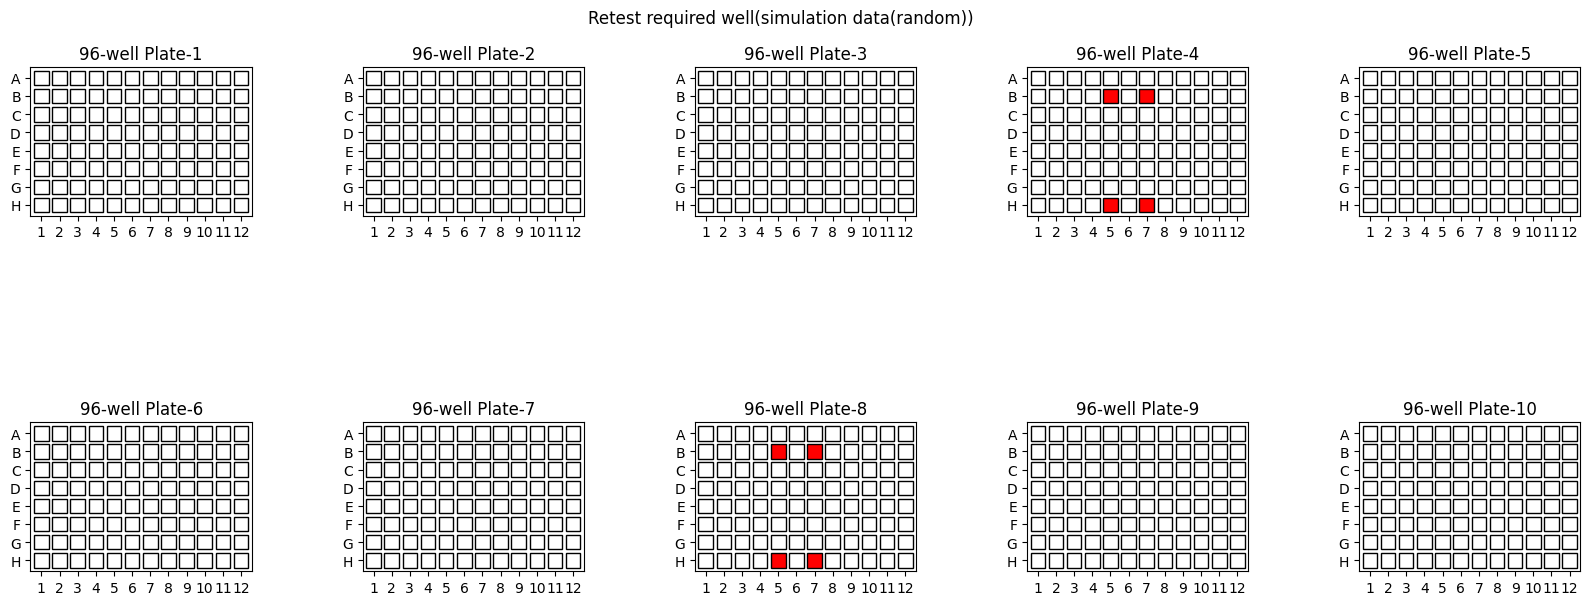

In [259]:
mode = 'simulation data(random)'

fig = plt.figure(figsize=(20, 20))
cnt = 0

for well_number in range(sample_size[2]):
    ax = fig.add_subplot(2, 5, well_number+1)
    well_size = 0.8
    
    for i in range(sample_size[0]):
        for j in range(sample_size[1]):
            if cnt in re_test_index:
                color = 'red'
            else:
                color = 'white'
            rect = patches.Rectangle((i+0.1, 7-j+0.1), well_size, well_size, linewidth=1, edgecolor='black', facecolor=color)
            ax.add_patch(rect)

            cnt += 1
    
    ax.set_xticks([i + 0.5 for i in range(12)])
    ax.set_xticklabels([str(i + 1) for i in range(12)])
    
    ax.set_yticks([i + 0.5 for i in range(8)])
    ax.set_yticklabels(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'][::-1])  # Y軸のラベルは逆順
    
    ax.set_xlim(-0.1, 12.1)
    ax.set_ylim(-0.1, 8.1)
    
    ax.set_aspect('equal', 'box')
    
    ax.set_title(f'{sample_size[0] * sample_size[1]}-well Plate-{well_number+1}')

fig.suptitle(f'Retest required well({mode})', y=0.65)
fig.subplots_adjust(wspace=0.5, hspace=-0.7)

## 再テストが必要なwellを可視化(Improved)

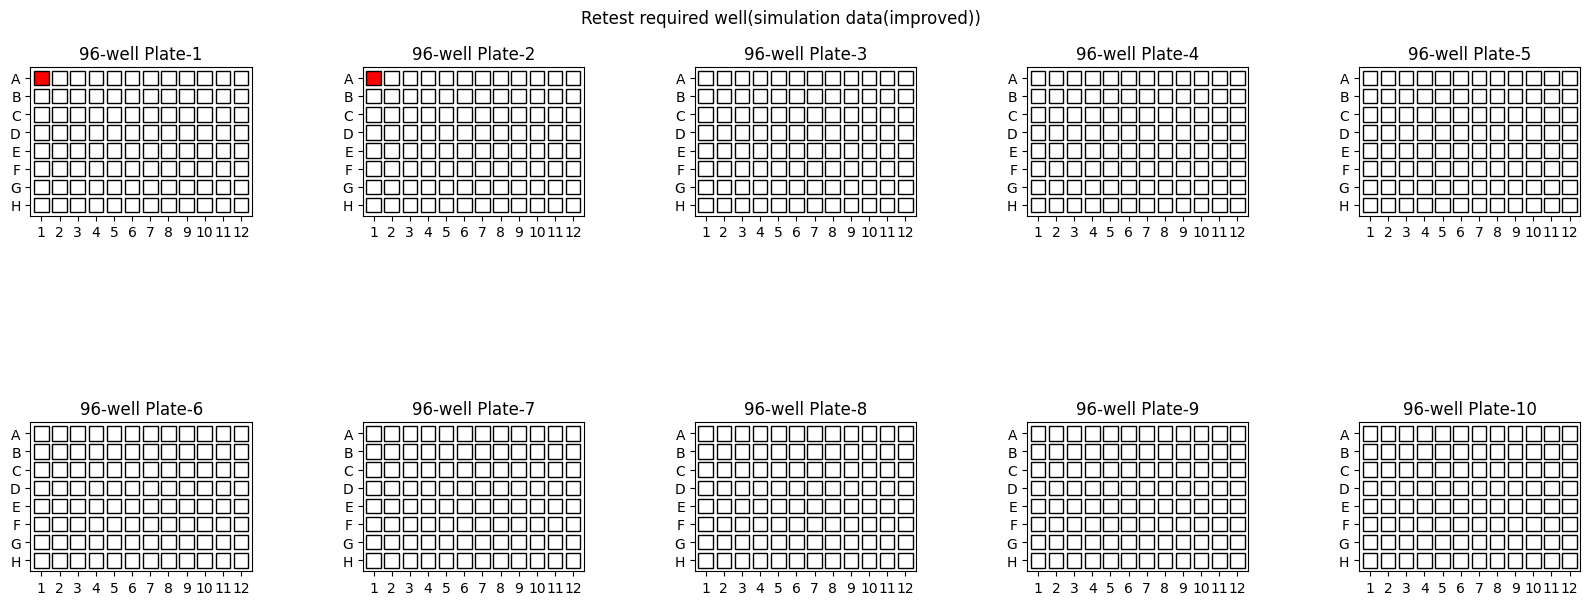

In [257]:
mode = 'simulation data(improved)'

fig = plt.figure(figsize=(20, 20))
cnt = 0

for well_number in range(sample_size[2]):
    ax = fig.add_subplot(2, 5, well_number+1)
    well_size = 0.8
    
    for i in range(sample_size[0]):
        for j in range(sample_size[1]):
            if cnt in re_test_arranged_index:
                color = 'red'
            else:
                color = 'white'
            rect = patches.Rectangle((i+0.1, 7-j+0.1), well_size, well_size, linewidth=1, edgecolor='black', facecolor=color)
            ax.add_patch(rect)

            cnt += 1
    
    ax.set_xticks([i + 0.5 for i in range(12)])
    ax.set_xticklabels([str(i + 1) for i in range(12)])
    
    ax.set_yticks([i + 0.5 for i in range(8)])
    ax.set_yticklabels(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'][::-1])  # Y軸のラベルは逆順
    
    ax.set_xlim(-0.1, 12.1)
    ax.set_ylim(-0.1, 8.1)
    
    ax.set_aspect('equal', 'box')
    
    ax.set_title(f'{sample_size[0] * sample_size[1]}-well Plate-{well_number+1}')

fig.suptitle(f'Retest required well({mode})', y=0.65)
fig.subplots_adjust(wspace=0.5, hspace=-0.7)